In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('Maintenance.csv')

In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df=data.copy()

In [6]:
columns=df.columns
print(len(columns))
columns

14


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [10]:
df.rename(columns={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, inplace=True)

In [11]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
df.shape

(10000, 12)

In [13]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [14]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [15]:
df['Type']=df['Type'].map({"L":0,"M":1,"H":2})
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [16]:
for col in df.columns:
    if df[col].dtype=='int64':
        df[col]=df[col].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  float64
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  float64
 6   Machine failure      10000 non-null  float64
 7   TWF                  10000 non-null  float64
 8   HDF                  10000 non-null  float64
 9   PWF                  10000 non-null  float64
 10  OSF                  10000 non-null  float64
 11  RNF                  10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [18]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df['RNF'].value_counts()

0.0    9981
1.0      19
Name: RNF, dtype: int64

In [20]:
conditions = [
    (df['TWF'] == 1),
    (df['HDF'] == 1),
    (df['PWF'] == 1),
    (df['OSF'] == 1),
    (df['RNF'] == 1),
    ((df['Machine failure']==1.0) & (df['TWF']==0.0) & (df['HDF']==0.0) & (df['PWF']==0.0) & (df['OSF']==0.0) & (df['RNF']==0.0)),
    ((df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0)),
]


labels = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF','Failure','No Failure']

df['Failure Type'] = np.select(conditions, labels)


In [21]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1.0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Failure
1,0.0,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,No Failure
2,0.0,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,No Failure
3,0.0,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,No Failure
4,0.0,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,No Failure


In [22]:
df['Failure Type'].value_counts()

No Failure    9643
HDF            115
PWF             91
OSF             78
TWF             46
RNF             18
Failure          9
Name: Failure Type, dtype: int64

In [23]:
# machine failure occurs when there is no failure
df[(df['Machine failure']==1) & (df['TWF']==0.0) & (df['HDF']==0.0) & (df['PWF']==0.0) & (df['OSF']==0.0) & (df['RNF']==0.0)]

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
1437,2.0,298.8,309.9,1439.0,45.2,40.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
2749,1.0,299.7,309.2,1685.0,28.9,179.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
4044,1.0,301.9,310.9,1419.0,47.7,20.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
4684,1.0,303.6,311.8,1421.0,44.8,101.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
5536,1.0,302.3,311.8,1363.0,54.0,119.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
5941,0.0,300.6,310.7,1438.0,48.5,78.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
6478,0.0,300.5,309.8,1663.0,29.1,145.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
8506,0.0,298.4,309.6,1710.0,27.3,163.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure
9015,0.0,297.2,308.1,1431.0,49.7,210.0,1.0,0.0,0.0,0.0,0.0,0.0,Failure


In [24]:
df['Failure Type']=df['Failure Type'].map({'No Failure':0,'HDF':1,'PWF':2,'OSF':3,'TWF':4,'RNF':5,'Failure':6})

In [25]:
df['Failure Type'].value_counts()

0    9643
1     115
2      91
3      78
4      46
5      18
6       9
Name: Failure Type, dtype: int64

In [26]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1.0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
x=df.loc[:,['Type','Air temperature','Process temperature','Rotational speed','Torque','Tool wear']]
y=df.loc[:,['Failure Type']]

In [28]:
x.head(2)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1.0,298.1,308.6,1551.0,42.8,0.0
1,0.0,298.2,308.7,1408.0,46.3,3.0


In [29]:
y.head(2)

,Failure Type
0,0
1,0


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)

In [31]:
xtrain.shape,xtest.shape

((8000, 6), (2000, 6))

In [32]:
ytrain.shape,ytest.shape

((8000, 1), (2000, 1))

In [33]:
ytest[ytest['Failure Type']==5]

,Failure Type
6960,5
7488,5
7868,5
1221,5


In [34]:
models={"LogisticRegression":LogisticRegression(),
       "DecisionTreeClassifier":DecisionTreeClassifier(),
       "RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),
       "SVC":SVC(),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "GaussianNB":GaussianNB()}

In [35]:
def evaluate_model(x_train,x_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model_name=list(models.keys())[i]
        model=list(models.values())[i]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_pred,y_test)
        print(f"{model_name} : {score}")
        report[list(models.keys())[i]]=score
    for key,value in report.items():
        if value==max(list(report.values())):
            best_model_name=key
    best_model=models[best_model_name]
    print(f"The best model is {best_model_name}")
    return best_model

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
model=evaluate_model(xtrain,xtest,ytrain,ytest,models)


LogisticRegression : 0.967
DecisionTreeClassifier : 0.9725
RandomForestClassifier : 0.9795
AdaBoostClassifier : 0.9
SVC : 0.9695
KNeighborsClassifier : 0.9685
GaussianNB : 0.958
The best model is RandomForestClassifier


In [38]:
ypred=model.predict(xtest)

In [39]:
model.predict([[0.0,298.4,309.6,1710.0,27.3,163.0]])

array([6], dtype=int64)

In [40]:
model.predict([[0,299.4,308.7,1446,62.9,134]])

array([2], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,ypred)
confusion_matrix

array([[1935,    0,    2,    0,    0,    0,    0],
       [   9,   11,    2,    1,    0,    0,    0],
       [   4,    0,    6,    0,    0,    0,    0],
       [  10,    0,    1,    7,    0,    0,    0],
       [   6,    0,    0,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

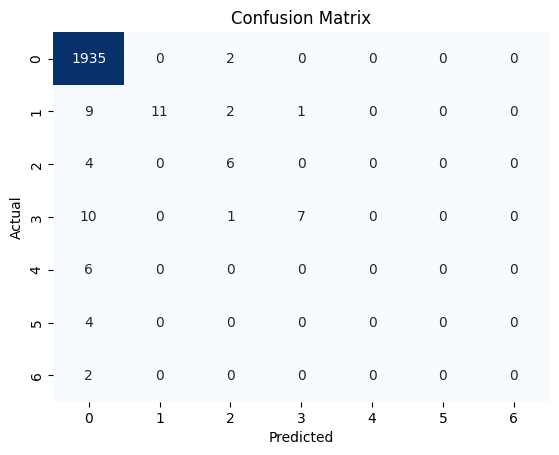

In [42]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [43]:
ytest[ytest['Failure Type']==4].shape

(6, 1)

In [44]:
ytrain[ytrain['Failure Type']==4].shape

(40, 1)

In [45]:
import pickle
filename = 'model.sav'
pkl.dump(model, open(filename, 'wb'))

In [46]:
ytest[ytest['Failure Type']==5]

,Failure Type
6960,5
7488,5
7868,5
1221,5


In [48]:
df[df['Failure Type']==4]

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
77,0.0,298.8,308.9,1455.0,41.3,208.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1087,2.0,296.9,307.8,1549.0,35.8,206.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1509,0.0,298.0,308.5,1429.0,37.7,220.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1682,2.0,297.9,307.4,1604.0,36.1,225.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1763,0.0,298.2,307.6,1511.0,31.0,209.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1996,1.0,298.4,308.0,1416.0,38.2,198.0,1.0,1.0,0.0,0.0,0.0,0.0,4
2166,1.0,299.6,309.2,1867.0,23.4,225.0,1.0,1.0,0.0,0.0,0.0,0.0,4
2244,1.0,299.3,308.4,1542.0,37.5,203.0,1.0,1.0,0.0,0.0,0.0,0.0,4
2671,1.0,299.7,309.3,1399.0,41.9,221.0,1.0,1.0,0.0,0.0,0.0,0.0,4
2864,2.0,300.6,309.4,1380.0,47.6,246.0,1.0,1.0,0.0,0.0,0.0,0.0,4
